# Synaptic Opto Analysis
Notebook to analyze synaptic responses to input-specific optogenetic stimulation

In [1]:
# Import modules
import os
import numpy as np
from Lab_Analyses.Behavior.process_multi_session_behavior import process_multi_session_behavior
from Lab_Analyses.Optogenetics.synaptic_opto_processing import synaptic_opto_processing
import Lab_Analyses.Optogenetics.synaptic_opto_plotting as plotting
from Lab_Analyses.Optogenetics.synaptic_opto_dataclass import Grouped_Synaptic_Opto_Data


In [2]:
# Setup mice list and parameters
## Mouse ids
id_1 = "JW268"

## Number of sessions for behavior
days_1 = ["240216"]

mouse_ids = [id_1]
days = [days_1]

## Other parameters
fov_type = "apical"

base_path = r'Z:\People\Jake\Behavior'

## Process behavioral data

In [ ]:
for mouse, day in zip(mouse_ids, days):
    print(f"---------------------\nAnalyzing Mouse {mouse}")
    process_multi_session_behavior(mouse_id=mouse, base_path=base_path, days=day, save=True)
    print(f"                           ", end="\r")
    print("Done")

## Analyze optogenetic responses

In [3]:
opto_data = synaptic_opto_processing(mouse_id=id_1, fov_type="apical", save=True)

----------------------------------------------------
Analyzing Mouse JW268
- Organizing FOV5_apical data
- Organizing FOV6_apical data
- Organizing FOV7_apical data
- Organizing FOV8_apical data


## Visualize data

In [4]:
# Group data
grouped_data = Grouped_Synaptic_Opto_Data(opto_data)

In [5]:
len(grouped_data.responsive_spines)

167

In [6]:
np.sum(grouped_data.responsive_spines) / len(grouped_data.responsive_spines)

0.08982035928143713

In [7]:
figure_path = r"C:\Users\Jake\Desktop\Figures\grouped_data\Spine_Opto\thal_test"

### Plot session activity

In [ ]:
plotting.plot_session_activity(
    dataset=grouped_data,
    identifier={"mouse_id": "JW268", "FOV": "FOV8_apical"},
    zscore=True,
    figsize=(7,8),
    save=False,
    save_path=None
)

getting mouse data
processing
Responsive idxs: [(2, 38), (42, 78), (45, 81)]
Non-responsive idxs: [(18, 54), (20, 56), (41, 77)]
plotting


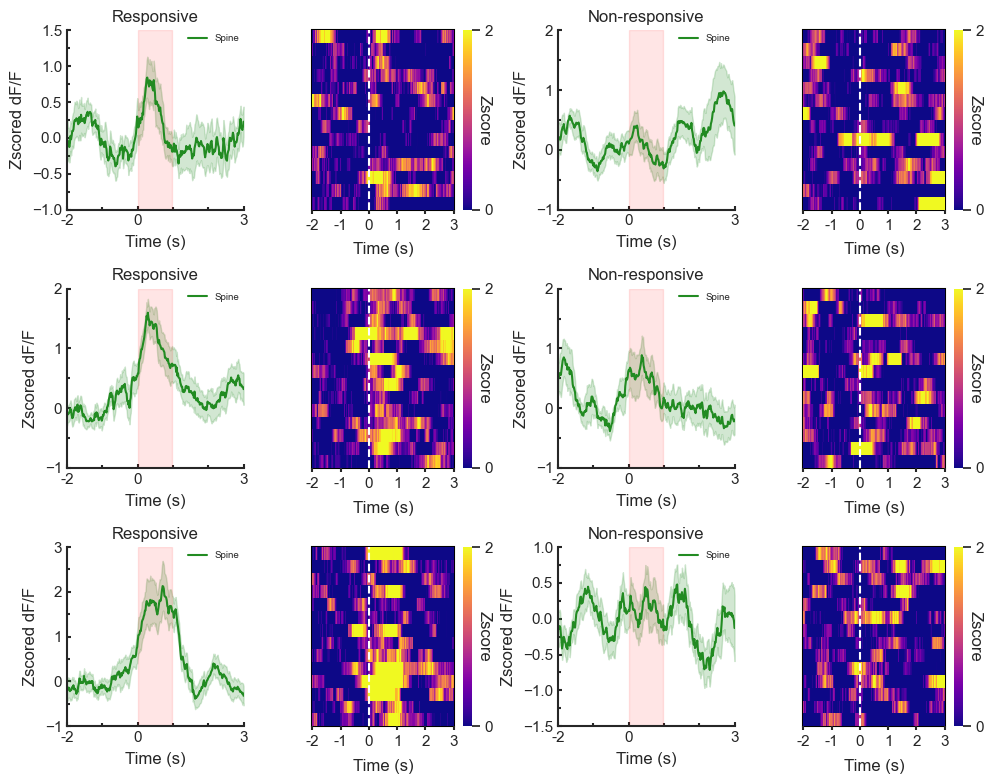

In [28]:
plotting.plot_individual_examples(
    dataset=grouped_data,
    identifiers={"mouse_id": "JW268", "FOV": "FOV6_apical"},
    hmap_range=(0, 2),
    figsize=(10,8),
    norm=False,
    save=True,
    save_path=figure_path,
)

In [ ]:
grouped_data.responsive_spines

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Jake\\Desktop\\Figures\\grouped_data\\Spine_Opto\\thal_test\\responsive_spine_properties.pdf'

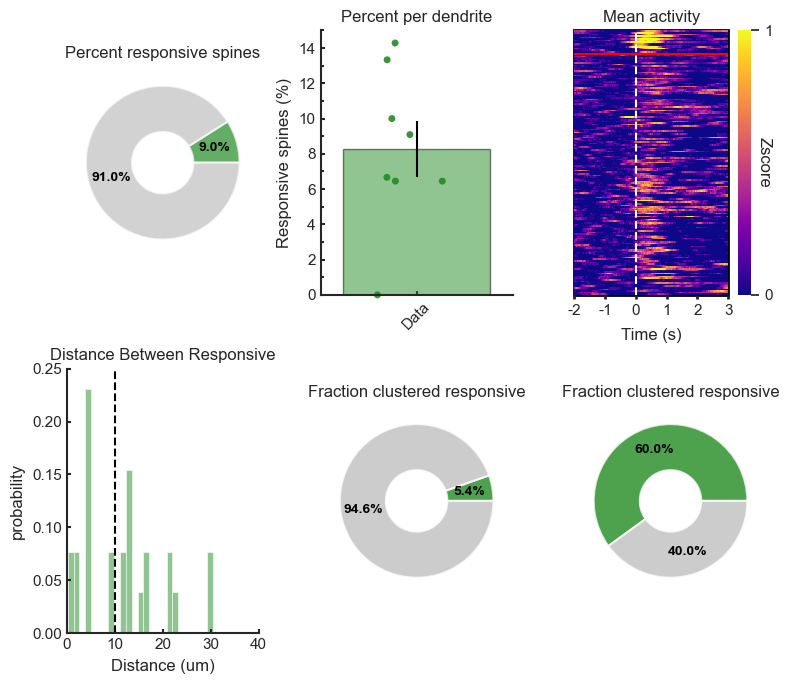

In [30]:
plotting.plot_responsive_synapse_properties(
    dataset=grouped_data,
    cluster_dist=10,
    hmap_range=(0,1),
    figsize=(8,7),
    save=True,
    save_path=figure_path
)

In [ ]:
a = np.array([0.6, 0.3, 0.9])

np.nanmean(a > 0.5)

In [ ]:
import sklearn

X = np.array([[1,2,3,4],
              [1,np.nan,3,4],
              [1,2,3,4],
              [1,2,np.nan,4]])


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform", copy=True)
new_x = imputer.fit_transform(X)

In [ ]:
new_x

In [ ]:
X

In [ ]:
>>> from sklearn import datasets, linear_model
>>> from sklearn.model_selection import cross_validate
>>> from sklearn.metrics import make_scorer
>>> from sklearn.metrics import confusion_matrix
>>> from sklearn.svm import LinearSVC
>>> diabetes = datasets.load_diabetes()
>>> X = diabetes.data[:150]
>>> y = diabetes.target[:150]
>>> lasso = linear_model.Lasso()

In [ ]:
>>> cv_results = cross_validate(lasso, X, y, cv=3, return_train_score=True, return_estimator=True, return_indices=True)
>>> sorted(cv_results.keys())


In [ ]:
cv_results["estimator"][0]

In [ ]:
a = np.array([[1,1,1],
              [1,1,1]])
b = a * 2
np.stack([a,b]).mean(axis=0)

In [ ]:
np.concatenate(a)